In [2]:
#import relevant libraries for data descriptions and pre processing
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [3]:
import io

In [4]:
from google.colab import files

In [5]:
#use upload function to upload file saved on local machine
data = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


In [7]:
#use pandas library to read uploaded csv file
df = pd.read_csv(io.StringIO(data['Video_Games_Sales_as_at_22_Dec_2016.csv'].decode('utf-8')))

In [8]:
#DATA CLEANING AND PRE-PROCESSING

In [9]:
#view the first 5 records in the data set
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Review summary statistics for data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [11]:
#Review descriptive statistics for data set
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [12]:
#check for missing values accross each attribute
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

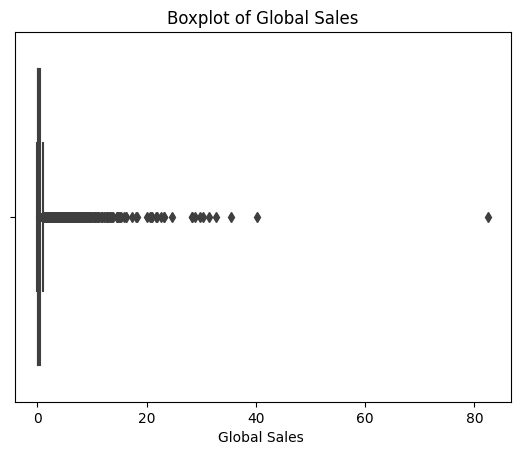

In [13]:
# Plotting a boxplot of 'Global Sales'
sns.boxplot(x=df['Global_Sales'])
plt.xlabel('Global Sales ')
plt.title('Boxplot of Global Sales')
plt.show()

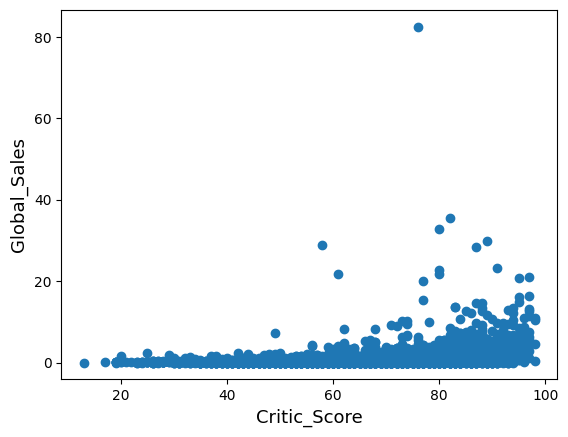

In [14]:
#Check for outliers again but with the dependant variable Global Sales and 1 independant variable Critic Score
fig, ax = plt.subplots()
ax.scatter(x = df['Critic_Score'], y = df['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

In [15]:
#Remove the outlier
df = df.drop(df[(df['Critic_Score']>60) & (df['Global_Sales']>60)].index)

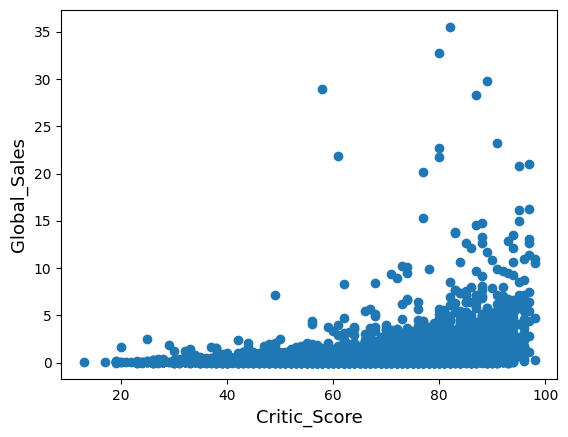

In [16]:
#Check again for outlier
fig, ax = plt.subplots()
ax.scatter(x = df['Critic_Score'], y = df['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

<ipython-input-17-b2a225d787a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_Sales'] , fit=norm);



 mu = 0.53 and sigma = 1.41



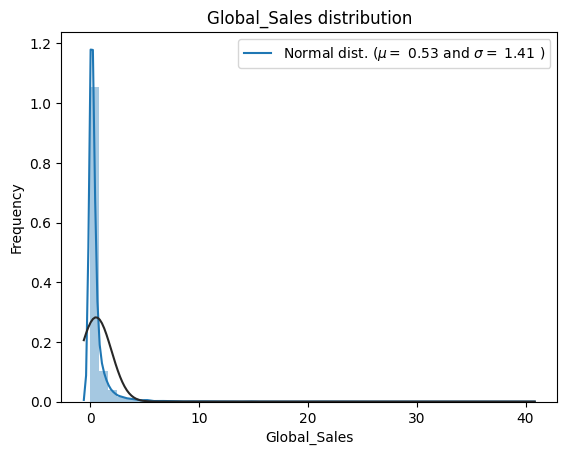

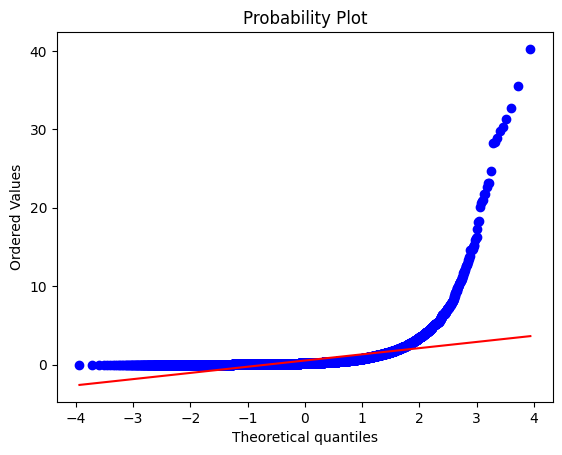

In [17]:
#Settng dependant variable as Global Sales
#Checking distribution of variable
sns.distplot(df['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Global_Sales'], plot=plt)
plt.show()

In [18]:
# CHECKING DISTRIBUTION OF GLOBAL SALES
# CLEARLY NOT NORMALLY DISTRIBUTED
# THEREFORE when we get to modelling we will test Linear Regression, Gradient Boosting Regressor, Random Forests, & SVM
# opportunity to use log to create a more normal data set later on

<ipython-input-19-489e1c8b66a1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='spearman')


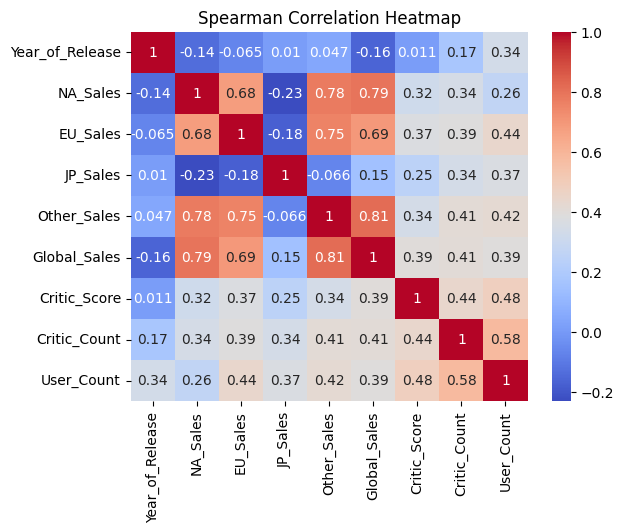

In [19]:
# Using Spearman as better for discrete values
# Default correlation coefficient is Pearson
correlation_matrix = df.corr(method='spearman')

# Create a heatmap of the correlation matrix
# The seaborn heatmap function is based off of the paerson correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.title('Spearman Correlation Heatmap')
plt.show()

In [20]:
# Clear to see that global sales is influenced by sales in other areas pretty highly which makes sense

In [21]:
#check for missing values accross each attribute
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [22]:
#create a new data frame to clean and preserve original dat frame
df_cleaned = df.copy()

In [23]:
#Remove records in data set where Name, Genre, Year_of_Release, and Publisher have missing values
for i, row in df_cleaned.iterrows():
    if pd.isnull(row['Name']) or pd.isnull(row['Genre']) or pd.isnull(row['Year_of_Release']) or pd.isnull(row['Publisher']):
        df_cleaned.drop(i, inplace=True)

In [24]:
#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [25]:
# Data set presents an issue with significant amount of missing values for critic score, critic count user score, user count, developer, and rating
# To help reduce the total missing variables lets remove some of the older platforms and focus on newer generations for the Platform Column


In [26]:
print(pd.value_counts(df_cleaned["Platform"]))

PS2     2127
DS      2122
PS3     1306
Wii     1285
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [27]:
# Choosing PS3, PS4, X360, XOne, Wii, WiiU, PC, DS, PSP
df_cleaned = df_cleaned[(df_cleaned['Platform'] == 'PS3') | (df_cleaned['Platform'] == 'PS4') | (df_cleaned['Platform'] == 'X360') | (df_cleaned['Platform'] == 'XOne') | (df_cleaned['Platform'] == 'Wii') | (df_cleaned['Platform'] == 'WiiU') | (df_cleaned['Platform'] == 'PC') | (df_cleaned['Platform'] == 'DS') | (df_cleaned['Platform'] == 'PSP')]

#Let's double check the value counts to be sure
print(pd.value_counts(df_cleaned["Platform"]))

#Let's see the shape of the data again
print(df_cleaned.shape)

DS      2122
PS3     1306
Wii     1285
X360    1232
PSP     1193
PC       952
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(8877, 16)


In [28]:
#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       4239
Critic_Count       4239
User_Score         2771
User_Count         4302
Developer          2725
Rating             2843
dtype: int64

In [29]:
# From here we have cut down a significant amount of missing data
# Lets drop all rows that have NA for Critic Score

In [30]:
df_cleaned = df_cleaned.dropna(subset=['Critic_Score'])

#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score          21
User_Count         478
Developer            3
Rating              72
dtype: int64

In [31]:
# Check Data Shape
print(df_cleaned.shape)

(4638, 16)


In [32]:
# Lets impute data for the missing User Score and User Count
# Lets drop missing records for rating and developer as it doesn't make sense to impute


In [33]:
#For Developer and Rating we will drop missing values
df_cleaned = df_cleaned.dropna(subset=['Developer'])
df_cleaned = df_cleaned.dropna(subset=['Rating'])

In [34]:
#There's "tbd" values in this column so we will replace first
df_cleaned['User_Score'] = df_cleaned['User_Score'].replace('tbd', None)

In [35]:
# Convert the feature data type to float
df_cleaned['User_Score'] = df_cleaned['User_Score'].astype(float)

# Print data types
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4566 entries, 2 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4566 non-null   object 
 1   Platform         4566 non-null   object 
 2   Year_of_Release  4566 non-null   float64
 3   Genre            4566 non-null   object 
 4   Publisher        4566 non-null   object 
 5   NA_Sales         4566 non-null   float64
 6   EU_Sales         4566 non-null   float64
 7   JP_Sales         4566 non-null   float64
 8   Other_Sales      4566 non-null   float64
 9   Global_Sales     4566 non-null   float64
 10  Critic_Score     4566 non-null   float64
 11  Critic_Count     4566 non-null   float64
 12  User_Score       4097 non-null   float64
 13  User_Count       4097 non-null   float64
 14  Developer        4566 non-null   object 
 15  Rating           4566 non-null   object 
dtypes: float64(10), object(6)
memory usage: 606.4+ KB


In [36]:
#Now we can handle the N/A and change to median
df_cleaned['User_Score'] = df_cleaned['User_Score'].fillna(df_cleaned['User_Score'].median())

In [37]:
# Fill User count with median value
df_cleaned['User_Count'] = df_cleaned['User_Count'].fillna(df_cleaned['User_Count'].median())


In [38]:
#Check missing values in data set after removing
df_cleaned.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [39]:
# Check Data Shape
print(df_cleaned.shape)

(4566, 16)


In [40]:
# Compare User Score to Critic Score
df_cleaned.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [41]:
# Critic Score is on a different scale
# Now we will multiply User Score by 10 to match the scale

In [42]:
# Iterate over each row in the DataFrame
for index, row in df_cleaned.iterrows():
    # Multiply the feature value by 10
    df_cleaned.at[index, 'User_Score'] = float(row['User_Score']) * 10


In [43]:
# Check Scores are on the same scale

In [44]:
df_cleaned.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E


In [45]:
# Check for duplicate values
# Not a problem because many games release on multiple platforms
df_cleaned[['Name']].duplicated().sum()

1661

In [46]:
# Checking for duplicates with same name and platform
df_cleaned[['Name','Platform']].duplicated(keep=False).sum()

6

In [47]:
#view attributes and values of all records with both Name and Platform having duplicate values
df_cleaned[df_cleaned[['Name','Platform']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.00,0.23,2.56,83.0,22.0,55.0,101.0,EA Tiburon,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,85.0,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,85.0,134.0,EA Canada,T
5973,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,85.0,525.0,Black Box,T
11716,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08,82.0,19.0,85.0,525.0,Black Box,T
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,55.0,101.0,EA Tiburon,E


In [48]:
# Drop records that seems like an error.
df_cleaned = df_cleaned.drop(16233)
df_cleaned = df_cleaned.drop(11716)
df_cleaned = df_cleaned.drop(1190)

In [49]:
# Check duplicates again
df_cleaned[['Name','Platform']].duplicated(keep=False).sum()

0

In [50]:
# FEATURE SELECTION and ENGINEERING
# To select best features for an SVM, Random Forest, Gradient Boosting Regressor
# These are the updated models due to the non-normal data set
# Focusing on L1 (Lasso) Regularitzation, Random Forest Feature Importance

In [51]:
# Developer has too many inuque values and will be dropped to make a smoother dummy encoding

In [52]:
# check data types for data

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4563 entries, 2 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4563 non-null   object 
 1   Platform         4563 non-null   object 
 2   Year_of_Release  4563 non-null   float64
 3   Genre            4563 non-null   object 
 4   Publisher        4563 non-null   object 
 5   NA_Sales         4563 non-null   float64
 6   EU_Sales         4563 non-null   float64
 7   JP_Sales         4563 non-null   float64
 8   Other_Sales      4563 non-null   float64
 9   Global_Sales     4563 non-null   float64
 10  Critic_Score     4563 non-null   float64
 11  Critic_Count     4563 non-null   float64
 12  User_Score       4563 non-null   float64
 13  User_Count       4563 non-null   float64
 14  Developer        4563 non-null   object 
 15  Rating           4563 non-null   object 
dtypes: float64(10), object(6)
memory usage: 606.0+ KB


In [53]:
# DATA has no missing values, problematic duplicates, Outliers and is to scale and is set to appropriate data types.
# Now time to run feature selection techniques

In [54]:
print(df_cleaned.shape) #pre-dummies shape

(4563, 16)


In [55]:
print(df_cleaned.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [56]:
# Check the total unique values of each object type feature

# Define the list of columns to check unique value totals
columns_to_check = ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

# Loop through each column and print unique value totals
for column in columns_to_check:
    unique_values = df_cleaned[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: Name, Unique Values: 2905
Column: Platform, Unique Values: 9
Column: Genre, Unique Values: 12
Column: Publisher, Unique Values: 217
Column: Developer, Unique Values: 1063
Column: Rating, Unique Values: 5


In [57]:
# Based on above results Developer will need to be dropped as they will add too many dummy variables
# This is known as curse of dimensionality which can lead to overfitting the model
# Dropping Name and Developer
#Planned on keeping Publisher but data would not work with linear regression with too many features. Dropping Publisher
df_cleaned = df_cleaned.drop(['Name', 'Developer', 'Publisher'], axis=1)
# Creating dummy data for only Platform, Genre, Rating.
df_cleaned = pd.get_dummies(data=df_cleaned, columns=['Platform', 'Genre', 'Rating'])

In [58]:
print(df_cleaned.shape) #post-dummies shape

(4563, 36)


In [59]:
# Using L1 regularization (Lasso) and Random forest to check feature scores

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

data_encoded = df_cleaned

# Separate the features (X) and the target variable (y)
X = data_encoded.drop('Global_Sales', axis=1)  # Adjust the column name of the target variable
y = data_encoded['Global_Sales']  # Adjust the column name of the target variable

# L1 Regularization (Lasso) feature selection
lasso_model = Lasso(alpha=0.1)  # Adjust the regularization parameter (alpha) as needed
lasso_model.fit(X, y)

# Get Lasso feature importance and select top 16 features
lasso_importances = pd.Series(lasso_model.coef_, index=X.columns).abs().nlargest(16)

# Feature Importance (Random Forest) feature selection
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances from Random Forest and select top 16 features
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).nlargest(16)

# Print the ranked list of features based on Lasso importance
print("Lasso Feature Importance (Top 16):")
print(lasso_importances)

# Print the ranked list of features based on Random Forest importance
print("\nRandom Forest Feature Importance (Top 16):")
print(rf_importances)


Lasso Feature Importance (Top 16):
EU_Sales           1.146809
NA_Sales           1.112765
Critic_Count       0.002006
User_Score         0.001065
Critic_Score       0.000176
User_Count         0.000007
Year_of_Release    0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Platform_DS        0.000000
Platform_PC        0.000000
Platform_PS3       0.000000
Platform_PS4       0.000000
Platform_PSP       0.000000
Platform_Wii       0.000000
Platform_WiiU      0.000000
dtype: float64

Random Forest Feature Importance (Top 16):
EU_Sales           0.450757
NA_Sales           0.382391
Other_Sales        0.139503
JP_Sales           0.011792
Rating_E           0.005973
Critic_Count       0.002197
Critic_Score       0.001352
User_Count         0.001308
User_Score         0.001040
Year_of_Release    0.000935
Platform_Wii       0.000791
Genre_Misc         0.000258
Platform_X360      0.000200
Genre_Racing       0.000193
Platform_DS        0.000189
Platform_PS3       0.000178
dtype: flo

In [60]:
# Based on the above we can see that sales has a big impact and may lead to a multicollinearity issue or redundancy issue
# Therefore we will drop all sales related independant variables
df_cleaned = df_cleaned.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)


In [61]:
print(df_cleaned.shape)

(4563, 32)


In [62]:
print(df_cleaned.columns)

Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_DS', 'Platform_PC',
       'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_Wii',
       'Platform_WiiU', 'Platform_X360', 'Platform_XOne', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Rating_E',
       'Rating_E10+', 'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')


In [63]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df_cleaned.drop('Global_Sales', axis=1)  # Adjust the column name of the target variable
y = df_cleaned['Global_Sales']  # Adjust the column name of the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (3650, 31)
y_train shape: (3650,)
X_test shape: (913, 31)
y_test shape: (913,)


In [64]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

<ipython-input-65-d7a3329ec11c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_log_transformed , fit=norm);



 mu = 0.41 and sigma = 0.46



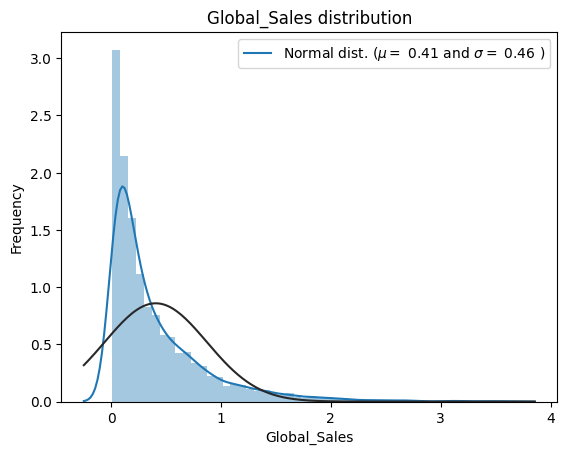

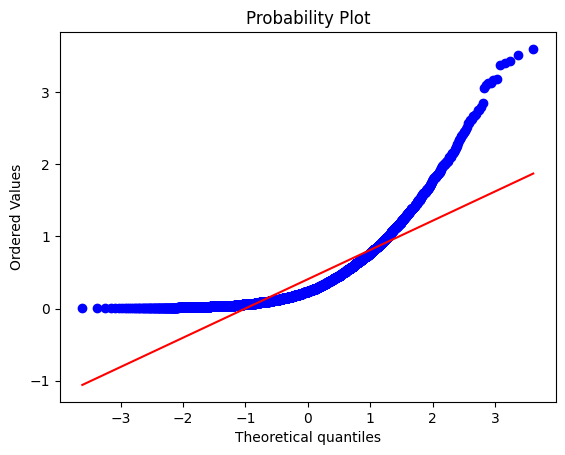

In [65]:
#Check the new distribution
Y_log_transformed = np.log1p(df_cleaned['Global_Sales']) #For comparison to earlier, here's the whole Y transformed
sns.distplot(Y_log_transformed , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_log_transformed)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Y_log_transformed, plot=plt)
plt.show()

In [66]:
# Get all independent variables in similar range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
import time
import sys
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Machine (SVM)': SVR()
}

# Iterate over each model
for model_name, model in models.items():
    print("Model:", model_name)

    # Measure memory consumption
    memory_usage = sys.getsizeof(model)
    print("Memory Usage:", memory_usage, "bytes")

    # Perform cross-validation
    start_time = time.time()
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    end_time = time.time()

    # Calculate training time
    training_time = end_time - start_time
    print("Training Time:", training_time, "seconds")

    # Calculate mean squared error (MSE) scores and convert to positive
    mse_scores = -scores
    print("Cross-Validation MSE Scores:", mse_scores)

    # Calculate mean MSE and convert to root mean squared error (RMSE)
    mean_mse = mse_scores.mean()
    rmse = mean_mse ** 0.5
    print("Mean RMSE:", rmse)

    print("-" * 40)


Model: Linear Regression
Memory Usage: 48 bytes
Training Time: 0.1870129108428955 seconds
Cross-Validation MSE Scores: [0.11924777 0.11184722 0.13083585 0.13238181 0.12241324]
Mean RMSE: 0.3512053207676284
----------------------------------------
Model: Random Forest Regression
Memory Usage: 48 bytes
Training Time: 9.977228879928589 seconds
Cross-Validation MSE Scores: [0.08310359 0.08565894 0.09340381 0.08845617 0.09020332]
Mean RMSE: 0.2969261930198273
----------------------------------------
Model: Gradient Boosting Regression
Memory Usage: 48 bytes
Training Time: 2.263319492340088 seconds
Cross-Validation MSE Scores: [0.08703366 0.0896843  0.08761434 0.09118965 0.09127763]
Mean RMSE: 0.29893128813884445
----------------------------------------
Model: Support Vector Machine (SVM)
Memory Usage: 48 bytes
Training Time: 3.003883123397827 seconds
Cross-Validation MSE Scores: [0.1670265  0.14480072 0.18027934 0.17748768 0.16236633]
Mean RMSE: 0.40791189575756687
-------------------------

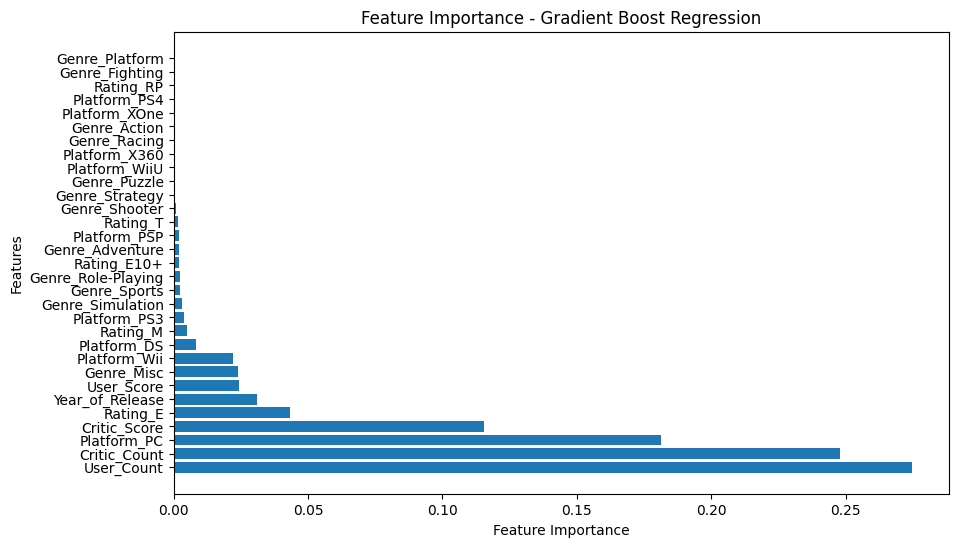

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Create a Gradient Boost Regressor Model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature importance
feature_importance = model.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), X_train.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Gradient Boost Regression')
plt.show()
